In [17]:
#imports
import argparse
import tensorflow as tf
import tensorflow_datasets as tfds
from util_FMNIST import load_data, preprocess_data
from model_FMNIST import fmnist_model1, fmnist_model2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

In [18]:
#load data:
train_data, val_data, test_data, num_classes = load_data()

#preprocess data:
train_data = train_data.map(preprocess_data).shuffle(10000).batch(128)
val_data = val_data.map(preprocess_data).batch(128)
test_data = test_data.map(preprocess_data).batch(128)

In [19]:
# Create models for 2 different architectures each with and without regularizer

#model:Tyler
models1 = [
    fmnist_model1(num_classes, use_regularizer=False),
    fmnist_model1(num_classes, use_regularizer=True)
]

#model : Jackson
models2 = [
    fmnist_model2(num_classes, use_regularizer=False),
    fmnist_model2(num_classes, use_regularizer=True)
]


In [5]:
histories = []

#Compile and train the first model: Tyler
for i, model in enumerate(models1):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    # Train model and save history
    history = model.fit(train_data, epochs=100, validation_data=val_data)
    histories.append(history)

    # Evaluate model on test data
    loss, accuracy = model.evaluate(test_data)
    print(f"Model {i} - Test loss: {loss}, Test accuracy: {accuracy}")
    
    # Save the trained model
    model.save(f"model_Tyler_{i}.h5")
  
  

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 0.3561 - accuracy: 0.8744 - val_loss: 0.3528 - val_accuracy: 0.8701
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8802 - val_loss: 0.3361 - val_accuracy: 0.8742
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3190 - accuracy: 0.8851 - val_loss: 0.3383 - val_accuracy: 0.8775
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.8921 - val_loss: 0.3159 - val_accuracy: 0.8831
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2880 - accuracy: 0.8964 - val_loss: 0.3122 - val_accuracy: 0.8882
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2776 - accuracy: 0.8994 - val_loss: 0.2986 - val_accuracy: 0.8920
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.9022 - val_loss: 0.3134 - val_accuracy: 0.8894
Epoch 

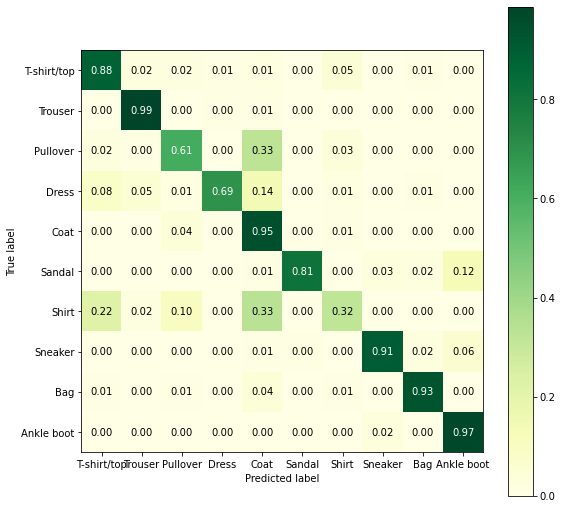

In [15]:

# Load the test data
test_data = tfds.load('fashion_mnist', split='test', as_supervised=True)

# Load the trained model
model = tf.keras.models.load_model('model_Tyler_1.h5')

# Get the class names
class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

# Make predictions on the test data
test_predictions = []
test_labels = []
for image, label in test_data:
    test_predictions.append(np.argmax(model.predict(np.expand_dims(image, axis=0))))
    test_labels.append(label.numpy())
    
    
# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(cm, cmap=plt.cm.YlGn)

# Add axis labels and a color bar
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
fig.colorbar(im)

# Add the values of the confusion matrix to each cell
thresh = cm.max() / 2.
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, '{:.2f}'.format(cm[i, j]),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

# Show the plot

plt.show()

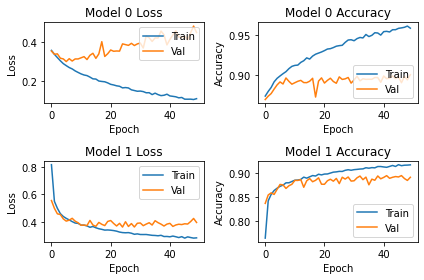

In [20]:
#plot training and validation accuracy and losses for Tyler:
for i, history in enumerate(histories):
    
    plt.subplot(2, 2, i*2+1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model {} Loss'.format(i))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    
    plt.subplot(2, 2, i*2+2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model {} Accuracy'.format(i))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    
plt.tight_layout()
plt.show()

In [21]:
histories2 = []


#Compile and train the second model: Jackson
for i, model2 in enumerate(models2):
    model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    # Train model and save history
    history2 = model2.fit(train_data, epochs=50, validation_data=val_data)
    histories2.append(history2)

    # Evaluate model on test data
    loss, accuracy = model2.evaluate(test_data)
    print(f"Model {i} - Test loss: {loss}, Test accuracy: {accuracy}")
    
    # Save the trained model
    model2.save(f"model_Jackson_{i}.h5")
  
  

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 0.7672 - accuracy: 0.7269 - val_loss: 0.4444 - val_accuracy: 0.8381
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.8267 - val_loss: 0.4359 - val_accuracy: 0.8378
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4513 - accuracy: 0.8424 - val_loss: 0.3650 - val_accuracy: 0.8622
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4195 - accuracy: 0.8543 - val_loss: 0.3518 - val_accuracy: 0.8695
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8590 - val_loss: 0.3425 - val_accuracy: 0.8726
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3844 - accuracy: 0.8652 - val_loss: 0.3414 - val_accuracy: 0.8739
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8679 - val_loss: 0.3223 - val_accuracy: 0.8819
Epoch 

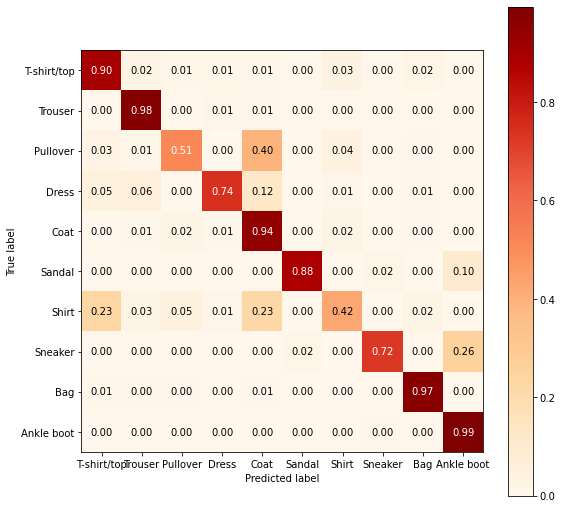

In [26]:
# Load the test data
test_data = tfds.load('fashion_mnist', split='test', as_supervised=True)

# Load the trained model
model = tf.keras.models.load_model('model_Jackson_1.h5')

# Get the class names
class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

# Make predictions on the test data
test_predictions = []
test_labels = []
for image, label in test_data:
    test_predictions.append(np.argmax(model.predict(np.expand_dims(image, axis=0))))
    test_labels.append(label.numpy())
    
    
# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(cm, cmap=plt.cm.OrRd)

# Add axis labels and a color bar
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
fig.colorbar(im)

# Add the values of the confusion matrix to each cell
thresh = cm.max() / 2.
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, '{:.2f}'.format(cm[i, j]),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

# Show the plot

plt.show()

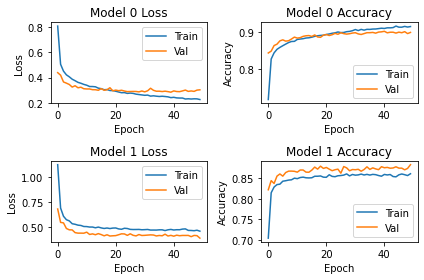

In [7]:
#plot training and validation accuracy and losses for Jackson:
for i, history in enumerate(histories2):
    
    plt.subplot(2, 2, i*2+1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model {} Loss'.format(i))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    
    plt.subplot(2, 2, i*2+2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model {} Accuracy'.format(i))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    
plt.tight_layout()
plt.show()